In [1]:
import pyhf
import numpy as np
import matplotlib.pyplot as plt
from pyhf.contrib.viz import brazil

In [2]:
pyhf.set_backend("numpy")

In [3]:
sig = {
    "name": "signal",
    "data": [6.0],
    "modifiers": [
        {
            "name": "mu",
            "type": "normfactor",
            "data": None
        }
    ]
}

In [4]:
bkg = {
    "name": "background",
    "data": [9.0],
    "modifiers": []   
}

In [5]:
channels = [
    {
        "name": "singlechannel",
        "samples": [sig, bkg]        
    }
]

In [6]:
measurements = [
    {
        "name": "measurement",
        "config": {
            "poi": "mu",
            "parameters": []
        }        
    }
]

In [7]:
observations = [
    {
        "name": "singlechannel",
        "data": [9.0]        
    }
]

In [10]:
#build workspace
workspace = {
    "channels": channels,
    "observations": observations,
    "measurements": measurements,        
    "version": "1.0.0"
}

In [12]:
#get ws, model, data
ws = pyhf.Workspace(workspace)
model = ws.model()
data = ws.data(model)

In [ ]:
#Alternative: simple model
#model = pyhf.simplemodels.uncorrelated_background(
#    signal=sig["data"], bkg=bkg["data"], bkg_uncertainty=[0.01]
#)
#data = observations[0]["data"] + model.config.auxdata

In [13]:
print(f"========== MODEL =========================")
print(f"  aux data: {model.config.auxdata}")
#print(f"      down: {model.expected_data([-1.0])}")
#print(f"   nominal: {model.expected_data([0.0])}")
#print(f"        up: {model.expected_data([1.0])}")
print("")

========== MODEL =========================
  aux data: []



In [14]:
poi_vals = np.linspace(0, 5, 41)
results = [
    pyhf.infer.hypotest(
        test_poi, data, model, test_stat="qtilde", return_expected_set=True,
#        calctype="toybased", ntoys=100
    )
    for test_poi in poi_vals
]

/home/spagan/.local/lib/python3.9/site-packages/pyhf/infer/calculators.py:369: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


/tmp/ipykernel_1188472/2674982968.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


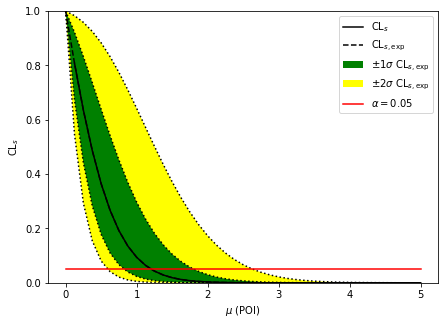

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
brazil.plot_results(poi_vals, results, ax=ax)
fig.show()

In [19]:
print("======== RESULTS =========")
for poi, cls_results in zip(poi_vals, results): #range(0,len(poi_vals))
    #results contain a list of (CLs_obs, (CLs_exp_m2sigma, CLs_exp_m1sigma, CLs_exp, CLs_exp_p1sigma, CLs_exp_p2sigma))
    cls_obs = cls_results[0]
    cls_exp = cls_results[1][2]
    cls_exp_plus = cls_results[1][3] - cls_exp
    cls_exp_minus = cls_exp - cls_results[1][1]
    print(f"mu = {poi}, CLs_obs = {cls_obs:.4f}, CLs_exp = {cls_exp:4f} +{cls_exp_plus:.4f} -{cls_exp_minus:.4f}")
    #    print(f"mu = {poi_vals[idx]}, CLs_obs = {cls_obs:.4f}, CLs_exp = {cls_exp:4f} +{cls_exp_plus:.4f} -{cls_exp_minus:.4f}")

======== RESULTS =========
mu = 0.0, CLs_obs = nan, CLs_exp = 1.000000 +0.0000 -0.0000
mu = 0.125, CLs_obs = 0.8077, CLs_exp = 0.807715 +0.1139 -0.1341
mu = 0.25, CLs_obs = 0.6350, CLs_exp = 0.635040 +0.1974 -0.1929
mu = 0.375, CLs_obs = 0.4869, CLs_exp = 0.486879 +0.2497 -0.2032
mu = 0.5, CLs_obs = 0.3647, CLs_exp = 0.364677 +0.2739 -0.1863
mu = 0.625, CLs_obs = 0.2673, CLs_exp = 0.267314 +0.2753 -0.1573
mu = 0.75, CLs_obs = 0.1921, CLs_exp = 0.192075 +0.2600 -0.1253
mu = 0.875, CLs_obs = 0.1355, CLs_exp = 0.135493 +0.2343 -0.0955
mu = 1.0, CLs_obs = 0.0940, CLs_exp = 0.093963 +0.2030 -0.0704
mu = 1.125, CLs_obs = 0.0641, CLs_exp = 0.064142 +0.1704 -0.0504
mu = 1.25, CLs_obs = 0.0431, CLs_exp = 0.043149 +0.1391 -0.0352
mu = 1.375, CLs_obs = 0.0286, CLs_exp = 0.028635 +0.1108 -0.0241
mu = 1.5, CLs_obs = 0.0188, CLs_exp = 0.018764 +0.0864 -0.0162
mu = 1.625, CLs_obs = 0.0122, CLs_exp = 0.012152 +0.0661 -0.0107
mu = 1.75, CLs_obs = 0.0078, CLs_exp = 0.007784 +0.0497 -0.0070
mu = 1.875, C